In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix

In [2]:
data=pd.read_excel('EastWestAirlines.xlsx',index_col=0,sheet_name='data') 

In [3]:

data=data.reset_index()

In [4]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.mean()

ID#                   2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
dtype: float64

In [6]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


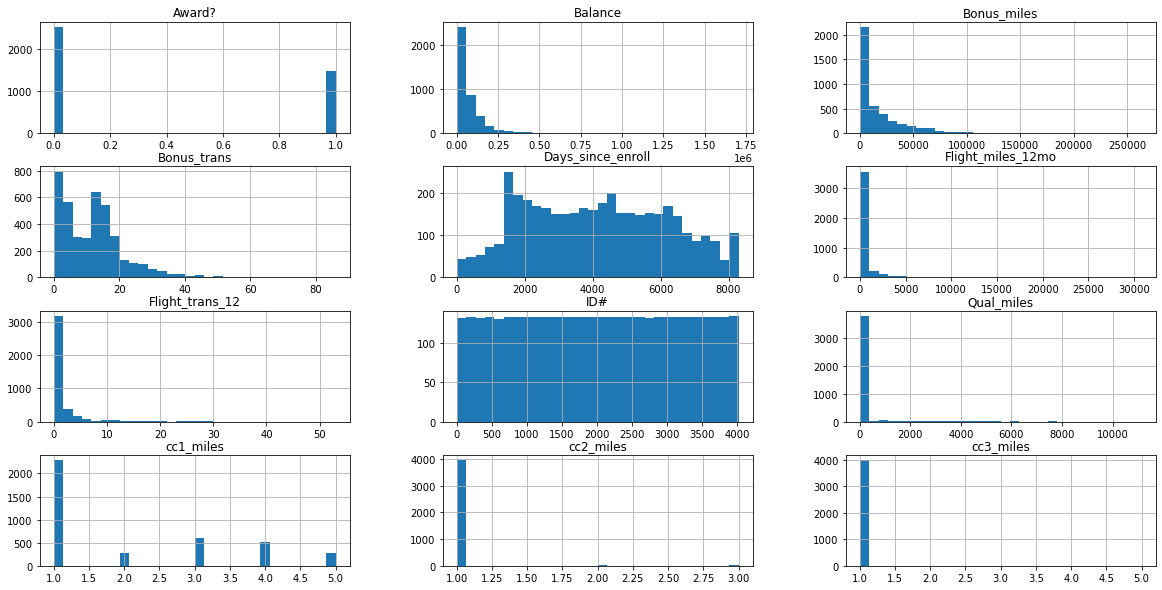

In [7]:
data.hist(bins=30,figsize=(20, 10))
plt.show()

In [8]:
data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [9]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [10]:
data.shape

(3999, 12)

In [11]:
def norm(i):
    return (i-i.min())/(i.max()-i.min())

In [12]:
datasub=data.iloc[:,1:]

In [13]:
datasub=norm(datasub)

In [14]:
#dendrogram=sch.dendrogram(sch.linkage(datasub,method='average'))

# single and average performs badly and uneven cluster are obtained 
# complete provides reasonable distribution of cluster
# Ward performs the best distribution of cluster 

In [15]:
hc= AgglomerativeClustering(n_clusters=8,affinity='euclidean',linkage='ward')

In [16]:
Clus=hc.fit_predict(datasub)
Clusters=pd.DataFrame(Clus,columns=['Clusters'])

In [17]:
data['Cluster']=hc.labels_

In [18]:
data.groupby(['Cluster']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,,
0,520,520,520,520,520,520,520,520,520,520,520,520
1,535,535,535,535,535,535,535,535,535,535,535,535
2,582,582,582,582,582,582,582,582,582,582,582,582
3,665,665,665,665,665,665,665,665,665,665,665,665
4,699,699,699,699,699,699,699,699,699,699,699,699
5,364,364,364,364,364,364,364,364,364,364,364,364
6,288,288,288,288,288,288,288,288,288,288,288,288
7,346,346,346,346,346,346,346,346,346,346,346,346


In [19]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler_data=scaler.fit_transform(data.iloc[:,0:])

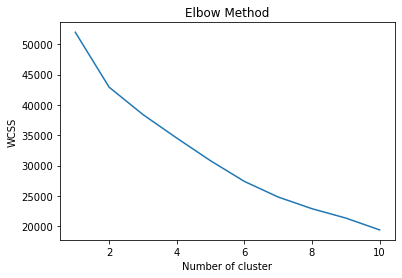

In [20]:
Wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_data)
    Wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),Wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [21]:
cluster_new=KMeans(8,random_state=42)
cluster_new.fit(scaler_data)

KMeans(random_state=42)

In [22]:
data['kCluster']=cluster_new.labels_

In [23]:
data.groupby(['Cluster']).count()
# the distribution of hirarchical  cluster is not evenly distributed among different cluster 
# only two clusters contains more than 97% of data 
#

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kCluster
Cluster,,,,,,,,,,,,,
0,520,520,520,520,520,520,520,520,520,520,520,520,520
1,535,535,535,535,535,535,535,535,535,535,535,535,535
2,582,582,582,582,582,582,582,582,582,582,582,582,582
3,665,665,665,665,665,665,665,665,665,665,665,665,665
4,699,699,699,699,699,699,699,699,699,699,699,699,699
5,364,364,364,364,364,364,364,364,364,364,364,364,364
6,288,288,288,288,288,288,288,288,288,288,288,288,288
7,346,346,346,346,346,346,346,346,346,346,346,346,346


In [24]:
data.groupby(['kCluster']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
kCluster,,,,,,,,,,,,,
0,973,973,973,973,973,973,973,973,973,973,973,973,973
1,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331
2,933,933,933,933,933,933,933,933,933,933,933,933,933
3,136,136,136,136,136,136,136,136,136,136,136,136,136
4,15,15,15,15,15,15,15,15,15,15,15,15,15
5,510,510,510,510,510,510,510,510,510,510,510,510,510
6,43,43,43,43,43,43,43,43,43,43,43,43,43
7,58,58,58,58,58,58,58,58,58,58,58,58,58


In [25]:
data.groupby(['kCluster']).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
kCluster,,,,,,,,,,,,,
0,1588.842754,123537.077081,61.314491,3.980473,1.000000,1.002055,45254.357657,19.220966,368.928058,1.117163,4887.189106,0.724563,3.277492
1,3094.384673,34938.915853,40.809166,1.116454,1.000000,1.000000,3852.630353,5.987228,209.101427,0.646882,2215.762585,0.219384,3.451540
2,1002.631297,51544.025723,65.585209,1.105038,1.000000,1.001072,3983.248660,6.249732,264.353698,0.790997,5874.135048,0.332262,4.344051
3,1719.919118,193603.066176,488.485294,2.279412,1.000000,1.000000,34191.845588,28.654412,5823.448529,16.919118,4733.279412,0.830882,2.058824
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.533333
5,1921.419608,80977.737255,28.096078,2.580392,1.000000,1.000000,15432.233333,15.876471,145.717647,0.427451,4262.123529,0.007843,0.149020
6,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,2.674419
7,2083.603448,118527.293103,5486.241379,2.051724,1.000000,1.000000,19386.500000,12.500000,980.724138,2.913793,3928.534483,0.551724,2.500000


In [ ]:
conclusion: key areas of consideration

Flying pattern                                        Flight_miles_12mo
Earning and use of frequent flyer rewards             cc1_miles
Use of the airline credit card                        cc2_miles

key cluster's groups : 0,1,2,4,6
Cluster 0,1,2,4,5 has same cc2 mile values and these five cluster's togeather constitute 97% of the data 

OBSERVATION:

Cluster 0,1,2 has cc1_miles values between 0 to  2

  cluster 1,2 has low averege flight miles travelled 
  cluster 0 has average filght miles travelled

Cluster 4,6 has cc1_miles values greater than 2

  cluster 4 has the highest flight miles travelled 
  cluster 6 has an average flight miles travelled


with the help of above table, it is easy to distinguish cluster's based on the mean features values.
